# Introducing Python and Jupyter Notebook

What you are reading now is an example of a Jupyter Notebook. The basic concept is that of a "notebook" containing text and programming code. You can easily edit the notebook using your web browser. The notebook is stored on your computer, and your computer is acting as a web server in order to interact with the browser.

You can run the programs in the notebook and see the output of the programs within the notebook. This is a powerful paradigm that is well suited to physics research, particularly when collaborating with other people.

"Cells" in a Jupyter Notebook are rectangular areas on the page that contain either text (such as this cell) or Python code (such as the simple examples in the following few cells).

Text cells can be edited by double-clicking anywhere within the cell. 

Code cells can be edited by single clicking anywhere within the cell. 

You can also put text into a code cell as a comment (i.e., part of a program that is ignored by the computer when running it) by starting the line with the hash character: #. Actually, the hash can appear anywhere on a line, and the text following it, until the end of the line, is not part of the program itself.

Pressing shift-ENTER within a text cell will format and display the text. Pressing shift-ENTER within a code cell with execute the Python code, and display any output in your web browser, immediately below the cell.

## The following cells show Python being used as a calculator


In [1]:
# Lines starting with a hash are called comments. You can use them
# to explain (to a human) the operation of your code.

# Python will print the result of whatever you type into 
# a code cell. Python can do simple mathematics, e.g.,:

1 + 1

2

In [2]:
# Here we are assigning an intermediate result to a 
# variable "a". This variable will be available in later
# cells, provided this cell has been run by pressing shift-ENTER.

a = 1 / 7
a

0.14285714285714285

Note that you have to be careful with integer division. Python version 3 and above will give you a floating-point result, whereas earlier versions removed the decimals (so 1/7 becomes 0, as does 6/7). If you want this so-called "floor division" in Python 3, use the "//" operator.

In [3]:
# Floor division removes the numbers after the decimal point.
# This is not the same as rounding.

1 // 7

0

In [4]:
# To round a floating-point number to the nearest integer, use
# the `round` function:

round(4 / 7)

1

In [5]:
# Modulo division gives the remainder after division:

8 % 7

1

In [6]:
# Multiplication uses an asterisk:

32 * 64

2048

In [7]:
# Exponents. Two to the power five:

2**5

32

In [8]:
# Scientific notation.

3.1E-2

0.031

Let's investigate Python's floating-point precision, i.e., how many decimal digits it carries in calculations. One way to do this is to perform calculations such $(\sqrt 2)^2-2$, or $(\sin(2\pi/3))^2-0.75$, the answers to which should be exactly zero. The reciprocal of the answers to these calculations will be approximately the number of digits of precision.

In [9]:
import numpy as np   # We will explain this line later...


print((2**0.5)**2 - 2)
print((np.sin(np.pi*2/3))**2 - 0.75)

4.440892098500626e-16
1.1102230246251565e-16


Note that we used `print` statements above, since Jupyter notebook only displays the last result of a cell by default.  We could have left out the last `print`.

Anyway, it looks like we have about 15 digits of floating-point precision, which is what you expect from an [IEEE 64-bit floating-point number](https://en.wikipedia.org/wiki/IEEE_754-1985). I.e., if you have 64 binary bits available, then you can store a number with about 15 decimal digits of signed mantissa, and a few digits of signed exponent. Modern computers tend to work most naturally with 64 bits at a time. A decade or more ago, 32 bits was the most common length for storing a number.

How about integer calculations? Are we limited to the largest integers that can be stored in 64 bits? Let's see:

In [10]:
2**6400

3908159226643238733174614283614836731126768107046341227250667472076853556843013838172049588691174330707818243450118448302812729951247321576513166624369426519566175521146060765081679976758041720679300544142578899999682218145590731711215852375861916259684264866953944533853780206232109689860956552348006732061695789938930646213944790078445226547509325302609329069445117085739611168420511100727807029960219755304683343928522835681236580544749345772997687789272005780505845692810279598474814928801575139205787258048513369093710961312514682075899525393917486191722044010992536554254433346757797401453317441157668323475117378300300675380311411783720892291860208840935427421876878495172143644788379083826461955232814452670024106634029782444314857725946984340662589552137681187058855370840678104158373102913142935322248166923135606488577076176786571072087787275721151671449698445547824376581179228842823243076579850082699440910879690172701654935338585419237394528910219466400398711390146945174827484382033620

Wow, that it impressive! It looks like we have unlimited numbers of digits for integers. This is a huge advantage for some sorts of calculations. The downside will be that integer arithmetic is going to be much slower than if it was limited to 64 bits. Then again, if you really need exact integer arithmetic without overflows, Python is one of the few programming languages to provide it easily.

In [11]:
# Python will also evaluate logical statements.

1 == 1

True

In [12]:
1 > 2

False

In [13]:
# You can use logical operators in if/else statements:

b = 5
if b > 5:
    print('b is greater than five')
else:
    print('b is less than or equal to five')

b is less than or equal to five


In [14]:
# The following expression uses all the available
# logical operators (and, or, not).
# Parenthesis are useful to make the meaning of complicated
# logical expressions clear.

((1 < 2) and (2 <= 2) and (1 != 2)) or (2 > 1) or not (2 == 2)

True

## Case sensitivity

Python cares whether letters are capitalised. The variables we have used so-far are called 'a' and 'b'. Note that 'A' and 'B' are entirely different (currently not defined) variables. If you want to read in a file called 'flight_variables.txt' but you ask for 'Flight_Variables.txt', it will not find your file.

Let's see what happens when you run the next cell, when 'A' is not defined.

In [15]:
A

NameError: name 'A' is not defined

## Libraries

When you first start up Python, it will already have quite a large number of tools available. Its so-called *standard library* of functions is pretty large.

However, there are a number of mathematical operations and data types that are important for working with data that are not part of the standard library. These can be installed as part of Anaconda, and once you *import* them, you can use them.

Some libraries have sub-libraries for specific purposes, and you can import just the sub-library if that's all you want.

One programming style is to do all of your imports in one cell at the start of your notebook. Alternatively, add imports to each cell that needs them, so that the cells can be executed independently of any others.

# Importing libraries works like this

If you want the whole library to be directly available:

In [16]:
# pandas is a very useful library of data analysis tools.

import pandas

To avoid lots of typing, you can modify the name of the imported functions, e.g., after the following example we can refer to np.pi rather than numpy.pi.

In [17]:
# numpy is an essential set of mathematical tools, we will be
# using it in almost every program in this course.

import numpy as np

In [18]:
# The routines in numpy can now be accessed like this, rather
# than having to type "numpy" each time:

print(np.pi, np.abs(np.sin(np.pi/3)), np.mean([1,3,5,7,9]))

3.141592653589793 0.8660254037844386 5.0


And if you're not sure what routines are available in numpy, or what the one you want is called, Jupyter can show you a list. E.g., if you type 'np.g' and then press the tab key, you will see a list of all numpy functions that start with a 'g'. NOTE: you must have executed the earlier `import numpy as np` cell for this to work here; also note that it can take a while for the computer to respond to the tab since there may be a lot of functions to display.

In [ ]:
np.g

To obtain documentation on a function, you can use the `help()` function

In [20]:
help(np.gradient)
help(round)

Help on function gradient in module numpy:

gradient(f, *varargs, **kwargs)
    Return the gradient of an N-dimensional array.
    
    The gradient is computed using second order accurate central differences
    in the interior points and either first or second order accurate one-sides
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.
    
    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : list of scalar or array, optional
        Spacing between f values. Default unitary spacing for all dimensions.
        Spacing can be specified using:
    
        1. single scalar to specify a sample distance for all dimensions.
        2. N scalars to specify a constant sample distance for each dimension.
           i.e. `dx`, `dy`, `dz`, ...
        3. N arrays to specify the coordinates of the values along each
           dimension of

You can also import just a sub-library if that is all that you need:

In [21]:
import matplotlib.pyplot as plt

# (matplotlib.pyplot is the library you need for almost
# all plots and figures. It has nearly endless options).

%matplotlib inline

# The above command makes your matplotpib.pyplot figures
# show up in your notebook, which is generally what you want.
# Another approach is to say:

# Uncomment the next line to activate notebook mode.

#%matplotlib notebook  

# This makes the plots interactive, i.e., you can pan, zoom
# and scale them within the browser. Click on the "power" 
# icon, to the right of the Figure heading, when you have finished.

## Important note: restarting the Python notebook kernel

Sometimes Python notebook has a glitch and doesn't work as you might expect. This happened to us in lectures when uncommenting the above `%matplotlib notebook` line didn't work. The solution is to restart the kernel using `Kernel -> Restart` from the menu bar. After doing this you will have to re-run any previous cells that you are dependent on (e.g., `import numpy` statments).

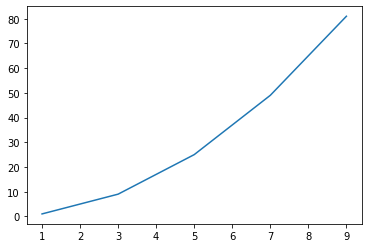

In [22]:
# Now try plotting 5 points.

plt.plot([1,3,5,7,9],[1,9,25,49,81])

# Using "Markdown" to enter text and equations

Text cells, such as this one, contain normal text such as the words in this sentence, with a few non-alphabetic characters used for special formating such as headings, italics, dot points, and mathematics. 

The special formatting is called "Markdown", and various versions of it are widely used throughout the internet. The version we are using is, I think, "github flavoured Markdown". Markdown is sufficiently rich in features that you can produce fairly reasonable documents with it.

Double-click somewhere in this cell to see the Markdown source for the cell. You can then press CTRL-ENTER to process the Markdown into displayed text.

Here are some examples of Markdown:

# To create a big heading, begin the line with a single hash

## More hashes produce 

### smaller

#### and smaller headings

* a dot point starts with an asterisk
* here is another dot point
* **bold text is delimited by double asterisks** like `**this**`
* *Italic text uses single asterisks*

  And here is a paragraph within a list item.
  
* **_bold italic_ is delimited by underscores within double asterisks** like `**_this_**`
* `monospaced font`, useful for code snippets, is done using backticks
* You might find a use for ~~strikethrough~~ text

Here is some in-line LaTeX for mathematics: $\pi\approx3.14159$

```
If you want a block of text to appear verbatim with a monospaced
font, enclose the text with lines containing triple opening single quotes.
Note that Markdown processing is suspended in verbatim mode,
so you can type $\pi$ and **bold** and have them displayed without interpretation
```

Block quotes can be useful, as Richard Feynman said:

> For a successful technology, reality must take precedence over public relations,
> for Nature *cannot* be fooled.

Hyperlinks are easy, e.g, here is [Michael Ashley's homepage](http://www.phys.unsw.edu.au/~mcba), or you can just use angle brackets to make a self-labelled link <https://oeis.org> (which is an interesting site to visit).

An enumerated list:
1. Uno
2. Dos
3. Tres
  1. Indent by two spaces
  2. for this effect
    1. And another two spaces
    2. for another level of indentation
   
Tables | Are | Easy
:---|:---:|---:
Note|the|alignment mechanism
Left|centred|right
1|2|3

You can add a horizontal rule using at least three dashes)

---

Here is the black body function as a equation on a separate line: $$b_\nu={2h\nu^3\over{c^2}}{1\over{\exp({h\nu\over{kT}})-1}}$$

Images can be easily inserted too:

![Text displayed if the image can't be displayed](http://www.phys.unsw.edu.au/~mcba/sfdsc06640.jpg "Text displayed if you hover over the image")

## Data types

Python has a rich set of data types, suitable for different situations and purposes. The following cell shows examples of all of Python's built-in data types.

In [24]:
# integers

t = 4 

# floating-point numbers

a = 1.234 

# complex numbers

b = 1.2 + 3.4j 

# strings; immutable

c = 'UNSW is an acronym'

# lists of things; mutable ordered collections of arbitrary objects

d = [1, 2, 3, ['arbitrary content', 1.2 + 3.4j]] 

# tuples; immutable ordered collections of arbitrary objects

e = (1, 'red', 1.2 + 3.4j, {})

# dictionaries; mutable unordered mappings from one "hashable" object
# to another object (which doesn't have to be "hashable")

f = {'red' : 1, 'green' : 2, (1, 2) : 3}

# sets; mutable unordered collections of unique and immutable objects

g = {'a', 'b', 2, (1, 2)} 

print(t, a, b * 2, c.upper(), d[3], e[3:1:-1], f['green'], g, 'b' in g)

4 1.234 (2.4+6.8j) UNSW IS AN ACRONYM ['arbitrary content', (1.2+3.4j)] ({}, (1.2+3.4j)) 2 {'a', 2, 'b', (1, 2)} True


Note the concepts of an object being *mutable* (i.e., able to be changed), and *immutable* (can not be changed).

Some data types can contain more than one object, in which case they are called *collections*.

Collections may be *ordered* (i.e., can be uniquely indexed using the natural integers; this applies to *lists* and *tuples*), or not (e.g., *dictionaries* and *sets* do not have an order). While you might think that a "dictionary" should have an order (i.e., alphabetically sorted), the "words" in a Python dictionary can be immutable objects such as lists, which don't have an obvious way of deciding "which comes first".

Finally, a *mapping* is the mathematical concept of associating one object with another (e.g., 'red' maps to 1 in the above example). In normal English-language usage, a "dictionary" maps words to their definitions.

In [25]:
# Here we try to alter the first object in the tuple "e".
# Since tuples are immutable, this fails.

print(e[0])
e[0] = 2
print(e[0])

1


TypeError: 'tuple' object does not support item assignment

Try executing the previous cell with "d" rather than "e". Do you see the difference?

So why do we have immutable objects?

They have some uses, e.g., it helps with program optimisation to know when some things can't change; dictionary keys have to be immutable (see the discussion after the next cell).

In [26]:
# Here we alter the mapping of 'red' in the dictionary "f". 
# This succeeds since dictionaries are mutable. Note that when
# you display the value of "f", the order of the
# mappings returned is not defined.

print(f['red'])
f['red'] = [0,1]
f

1


{'red': [0, 1], 'green': 2, (1, 2): 3}

When creating a dictionary, the *keys* are the objects to the left of the colon, and the *values* are the objects to the right. E.g., `'red'` is a key, and `3` is its value. Note that keys have to be immutable objects (this is a requirement based on how dictionaries are stored for quick access), but values can be mutable.

Sets in Python are like their mathematical namesakes. The order of elements is irrelevant, and multiple identical elements are redundant (i.e., `{1,1}` is the same as `{1}`).

In [27]:
print({1, 'a'} == {'a', 1})  # Showing that the order of 
                             #   elements is irrelevant.
print((1, 'a') == ('a', 1))  # Which isn't the case for tuples.
print({1,1,1}  == {1})       # Showing that multiple identical 
                             #   elements shortened to one

True
False
True


## Arrays

To construct one-dimensional or multi-dimensional arrays of numbers, you need to use a *function* such as np.array or np.ndarray:

In [28]:
import numpy as np

# A 1D array.

np.array([8,7,6,5,4,3,2])

array([8, 7, 6, 5, 4, 3, 2])

Try squaring the numbers in the array by adding `**2` at the end of the line above. What happens if you use `**100` instead? Next try changing the `8` to `8.0`. Can you explaining what is going on?

Note that, for efficiency, numpy uses reserves a fixed number of bits for each entry in an array. So, you lose the infinite integer precision that Python usually has. By default, numpy integer arrays use 32-bits of precision. If you want 64-bits, you can ask for it as follows:

In [29]:
np.array([8,7,6,5,4,3,2], dtype=np.int64)

array([8, 7, 6, 5, 4, 3, 2], dtype=int64)

### Higher dimensional arrays

In [30]:
# A 2D array.

np.array([[1,2,3,4,5], [1,4,9,16,25], [1,16,81,256,525]])

array([[  1,   2,   3,   4,   5],
       [  1,   4,   9,  16,  25],
       [  1,  16,  81, 256, 525]])

You can convert a list of numbers into a numpy array, which allows you to do mathematical operations on all the elements in the list at once:

In [31]:
list = [17,13,11,7,5,3,2]  # Create a list of numbers
arr = np.array(list)       # Convert the list to a numpy array
print(arr, arr**2)         # Print the numbers and their squares
print(np.sin(1.0/arr))     # Take the sine of the reciprocals 
                           #   of the numbers

[17 13 11  7  5  3  2] [289 169 121  49  25   9   4]
[0.05878961 0.07684724 0.09078392 0.14237173 0.19866933 0.3271947
 0.47942554]


You can also generate an array of all zeroes, all ones, all integers from zero to n-1, or n points between two limits:

In [32]:
# A 3x3 identity matrix, with an extra column of zeroes on the right.

np.eye(3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [33]:
# A 2x3 array of zeroes.

np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
# A 5x2 array of ones.

np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [35]:
# A 1D array of the ten even integers from 100 up.

np.arange(10) * 2 + 100


array([100, 102, 104, 106, 108, 110, 112, 114, 116, 118])

In [36]:
# A 1D array of 21 floating-point numbers linearly 
# spaced from 30 to 40.

np.linspace(30.0, 40.0, 21)

array([30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ,
       35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. ])

In [37]:
# A 3x3 array of normally distributed random numbers, 
# with mean 0.0 and standard deviation 1.0. This is a great
# example of the power of Python.

np.random.normal(0.0, 1.0, (3,3))

array([[-1.08784311,  1.5633438 ,  1.98945069],
       [ 1.88035364, -0.75376599, -1.209825  ],
       [ 1.05890766, -1.63481121, -0.71306502]])

# Indexing and slicing

With ordered data types such as *lists* and *arrays* and *strings*, you can retrieve subsets by their *index*, i.e., where they are in the list or array. Python indexing starts at zero. Some computer languages, e.g., FORTRAN, start at 1.

In [38]:
# We begin with "arr" as defined above.

arr

array([17, 13, 11,  7,  5,  3,  2])

In [39]:
# Element 0 is the first element in the array.

arr[0]

17

In [40]:
# Here is the fifth element.

arr[4]

5

In [41]:
# This gives you the last element.

arr[-1]

2

When you select a *range* of indices from i to j, using the range operator ":", Python gives you back elements i through j-1:

In [42]:
# Square brackets are required for selecting a subset.

arr[0:1]

array([17])

In [43]:
arr[3:5]

array([7, 5])

If you want to select all the way to one end of the array, you can leave that part blank and Python will understand what you mean:

In [44]:
arr[2:]

array([11,  7,  5,  3,  2])

In [45]:
arr[:4]

array([17, 13, 11,  7])

Selecting subsets works in multiple dimensions too:

In [46]:
arr2 = np.array([[0,1,2], [3,4,5], [6,7,8]])
arr2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
arr2[0,:]

array([0, 1, 2])

In [48]:
arr2[:,1]

array([1, 4, 7])

In [49]:
arr2[2,1:3]

array([7, 8])

You can use indexing to reverse character strings

In [50]:
a = 'abcdef'
a[::-1]

'fedcba'

In [51]:
arr2[1:3,1:3]

array([[4, 5],
       [7, 8]])

In [52]:
arr2[1:,::-1]

array([[5, 4, 3],
       [8, 7, 6]])

In [53]:
arr2[1:3,1:3] = np.eye(2,2)
arr2

array([[0, 1, 2],
       [3, 1, 0],
       [6, 0, 1]])

### Can you solve it?

1. Can you write an expression to return the 2x2 sub-array in the lower right corner of arr2? I.e., [[4,5],[7,8]]

2. Can you write an expression to return the 2x3 sub-array at the bottom of arr2, with the columns reversed? I.e., [[5,4,3],[8,7,6]]

3. Can you replace the 2x2 sub-array in the lower right corner with the 2x2 identity matrix?

## Loops

If you want to re-run a piece of code while changing an input variable, a `for` loop is what you want. If you want to repeat a piece of code until a certain condition is met, use a `while` loop. Loops can be nested inside other loops.

## Indentation

Python pays attention to how your code is indented. Indentation by a consistent number of spaces or tabs is required inside a loop or an `if` statement. Jupyter will automatically indent text after a line that begins with `for`, `while`, `if`, or `else`. Returning to no indentation indicates that the loop or `if` statement is finished; there is no 'end if', 'fi', 'end for', or brackets as there are in most computer languages.

In [54]:
for i in range(0,10):
    h=(i*3)+7
    print(h)

7
10
13
16
19
22
25
28
31
34


Note that similarly to when we were selecting a subset of an array, a `for` loop that starts with `for i in range(min,max):` goes from `i = min` to `i = max - 1`.

In [55]:
starlist=['Betelgeuse', 'Sirius', 'Canopus', 'Aldebaran']
for star in starlist:
    if star == 'Sirius':
        print(star, 'is very bright')
    else:
        print(star, 'is bright')

Betelgeuse is bright
Sirius is very bright
Canopus is bright
Aldebaran is bright


Note that the above `for item in list:` syntax is different to the `for i in range(min,max):` syntax in the previous example. "star" didn't exist as a variable when we wrote `for star in starlist`, but Python recognizes the structure of the `for` loop and makes it work.

In [56]:
i = 0
while np.sqrt(i) < 5:
    print(i)
    i = i + 4

0
4
8
12
16
20
24


## Building lists with loops

One of the handiest things we can do with a loop is to build a list one item at a time. That list can then be converted into a numpy array, so that you can perform mathematical operations on it.

In [57]:
# Create an empty list called 'luminosity'

luminosity = []

# The Stefan-Boltzmann constant (in cgs unit)

sigma = 5.6704E-5

# This is our set of input values for temperature

T = [3000.0, 3500.0, 4200.0, 5000.0, 6200.0, 7500.0]

# This is our set of input values for radius (in cgs)

r = [5.0E9, 1.5E14, 1.1E11, 1.4E11, 3.0E12, 6.0E12]

# Now loop over every element in T

for i in range(0,len(T)):
    luminosity.append(4*np.pi*r[i]**2*sigma*T[i]**4)

lumvec = np.array(luminosity)
print(lumvec)

# list.append() is a "method" that can be used on 
# any list - we will talk about methods more 
# in the demo notebook for Sarah Martell's Lecture 1.

[1.44294105e+30 2.40590379e+39 2.68290992e+33 8.72890262e+33
 9.47616965e+36 8.11654338e+37]


Although, that wasn't a great example since you could have used numpy's ability to do calculations on arrays to remove the `for` loop entirely, as follows:

In [58]:
lumvec = 4*np.pi*np.array(r)**2*sigma*np.array(T)**4
lumvec

array([1.44294105e+30, 2.40590379e+39, 2.68290992e+33, 8.72890262e+33,
       9.47616965e+36, 8.11654338e+37])

## Here are some example calculations, loops and plots:

The first one calculate the flux from a black body at a particular wavelength.

In [59]:
import math
import numpy as np

# Fundamental constants, in SI units.

planck = 6.626e-34
boltzmann = 1.381e-23
c = 2.998e8

# Input variables.

wavelength = 2.35e-6 # 2.35 microns, in the near infrared
t = 273.15 - 60

# Derived variables.

nu = c / wavelength

# The black-body formula.

bb = (2 * planck * nu**3)/(c**2 * (math.exp((planck * nu)/(boltzmann * t)) - 1.0))

print("bb = ", bb, " W m-2 sr-2 Hz-1")

# Convert to "radio astronomer's units" using 
# 1 Jansky = 1E-26 W m-2 Hz-1, and noting that a
# steradian is 4.254E10 square arcseconds.

bb *= 1.0E6 / (4.254E10 * 1.0e-26)
print("bb = ", bb, " uJy per sq arcsecond")


bb =  1.0336123927084526e-20  W m-2 sr-2 Hz-1
bb =  24.29742342991191  uJy per sq arcsecond


Note that you must have executed the previous cell for the next one to work

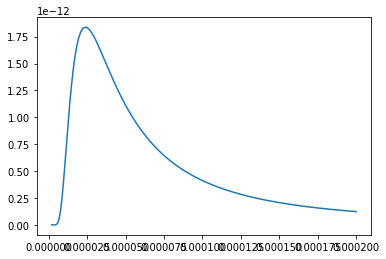

In [60]:
import matplotlib.pyplot as plt

# Plot the planck function as a function of wavelength,
# for a given temperature.

t = 273.15 -60  # -60C
wavelength = np.arange(2e-6, 200e-6, 0.1e-6) # from 2 to 200 microns

#t = 273.15+ np.arange(-65, -12, 1)
#wavelength = 2.4e-6

nu = c / wavelength

bb = (2 * planck * nu**3)/(c**2 * (np.exp((planck * nu)/(boltzmann * t)) - 1.0))

plt.plot(wavelength, bb)
plt.show()

enter the number of steps (e.g., 100): 100


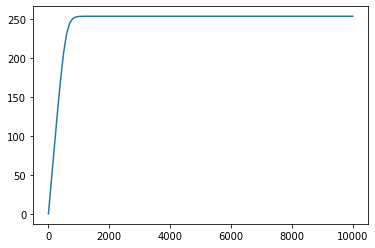

In [61]:
# This example models (crudely) the temperature of the 
# earth as it reaches equilibrium with the radiation from the sun.

import matplotlib.pyplot as plt

nSteps = int(input("enter the number of steps (e.g., 100): "))

timeStep = 100           # years
waterDepth = 4000        # meters
L = 1350                 # Watts/m2
heatCapacity = 1.6884E10 # J/K m2
albedo = 0.3
epsilon = 1
sigma = 5.67E-8          # W/m2 K4

time = [0]
T = [0]
heatContent = T[0] * heatCapacity

for i in range(0, nSteps):
    heatContent += (L * (1 - albedo) / 4 - epsilon * sigma * pow(T[-1], 4)) * timeStep * 365.25 * 24 * 3600
    T.append(heatContent / heatCapacity)
    time.append(time[-1] + timeStep)
    heatOut = sigma * pow(T[-1], 4)

#print(T[-1], heatOut)
plt.plot(time, T)
plt.show()

# Physical constants

Every conceivable physical constant (including their value, units, and uncertainty!) is defined for you in a dictionary in scipy.constants. For example:

In [62]:
import scipy.constants

print(scipy.constants.physical_constants['Stefan-Boltzmann constant'])
print(scipy.constants.physical_constants['atomic unit of 2nd hyperpolarizability'])

# To extract the constant itself (without the units and uncertainty)
# use the [0] index as follows:

sigma = scipy.constants.physical_constants['Stefan-Boltzmann constant'][0]
print(sigma)

# Alternatively, many commonly used constants are also in scipy.constants.

G = scipy.constants.G # the gravitational constant
sigma = scipy.constants.Stefan_Boltzmann

print(G, sigma)

(5.670367e-08, 'W m^-2 K^-4', 1.3e-13)
(6.235380085e-65, 'C^4 m^4 J^-3', 7.7e-73)
5.670367e-08
6.67408e-11 5.670367e-08


# 3D visualization

The following cells show examples of 3D visualization using a package called vpython. To run these cells you need to have `vpython` installed. You can do this with

`conda install -c vpython vpython`

from the Anaconda command line. When the cells are run, you can interact with the visualization by using a touchscreen, or right-click and move the mouse cursor. You can stop the program by using `Kernel->Restart`. Alternatively, you can type `ESC r` (where ESC is the escape key), and then `ESC y`.

In [ ]:
# Example of a bouncing ball.

from vpython import *
scene = canvas()

# Create a ball.

ball = sphere(pos = vector(0,4,0), radius = 1, color = color.red)

# Create a "floor" for the sphere to bounce off.

floor = box(pos = vector(0,0,0), length = 4, 
            height = 0.25, width = 4, color = color.green)

# Set the initial ball velocity, and the time increment.

ball.velocity = vector(0, -1, 0)
dt = 0.01

# Loop forever, updating the ball's position and velocity.

while True:
    rate(100) # Maximum of 100 updates a second.
    
    ball.pos = ball.pos + ball.velocity * dt
    
    if ball.pos.y < ball.radius:
        ball.velocity.y = abs(ball.velocity.y)
    else:
        ball.velocity.y = ball.velocity.y - 9.8 * dt
        

In [ ]:
# Example of binary star orbits, from http://www.glowscript.org

import scipy.constants
from vpython import *
scene = canvas()
scene.forward = vector(0,-.3,-1)

G = scipy.constants.physical_constants['Newtonian constant of gravitation'][0]

# Define a giant star, and give its initial position, 
# radius, mass, and momentum.

giant = sphere(pos = vector(-1e11,0,0), radius = 2e10, 
               color = color.red, make_trail = True, 
               trail_type = 'points', interval = 10, retain = 50)
giant.mass = 2e30
giant.p = vector(0, 0, -1e4) * giant.mass

# Do the same for its companion star.

dwarf = sphere(pos = vector(1.5e11,0,0), radius = 1e10, 
               color = color.yellow, make_trail = True, 
               interval = 10, retain = 50)
dwarf.mass = 1e30
dwarf.p = -giant.p

dt = 1e5 # time increment per loop in seconds

while True:
    rate(200)
    r = dwarf.pos - giant.pos # the relative position of the stars
    F = G * giant.mass * dwarf.mass * r.hat / mag2(r) # the attractive force
    giant.p = giant.p + F*dt # update the momenta, ensuring conservation
    dwarf.p = dwarf.p - F*dt
    giant.pos = giant.pos + (giant.p/giant.mass) * dt # update the positions
    dwarf.pos = dwarf.pos + (dwarf.p/dwarf.mass) * dt